In [3]:
Nama = "Ahmad Al-Kahfi Kenedy"
Kelas = "Sku2B"
Nim = "09011382227142"

print("  Nama = ",Nama, "\n", "Kelas = ",Kelas, "\n", "  Nim = ", Nim,)

  Nama =  Ahmad Al-Kahfi Kenedy 
 Kelas =  Sku2B 
   Nim =  09011382227142


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import Data 

In [5]:
df = pd.read_excel("https://raw.githubusercontent.com/Lite720/Tugas/main/ConcreteTest.xlsx")

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28,33.69
1,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
2,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
3,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
4,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14,24.99


In [7]:
df.head(900)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28,33.69
1,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76
2,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,3,7.32
3,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,120,40.86
4,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14,24.99
...,...,...,...,...,...,...,...,...,...
895,159.0,209.0,161.0,201.0,7.0,848.0,669.0,28,30.88
896,252.5,0.0,0.0,185.7,0.0,1111.6,784.3,28,19.77
897,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,100,40.86
898,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80


In [8]:
df.shape

(927, 9)

In [9]:
df.info

<bound method DataFrame.info of      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     310.0               143.0    111.0  168.0              22.0   
1     162.0               190.0    148.0  179.0              19.0   
2     182.0                45.2    122.0  170.2               8.2   
3     349.0                 0.0      0.0  192.0               0.0   
4     194.7                 0.0    100.5  165.6               7.5   
..      ...                 ...      ...    ...               ...   
922   166.1                 0.0    163.3  176.5               4.5   
923   296.0                 0.0    106.7  221.4              10.5   
924   236.0                 0.0      0.0  194.0               0.0   
925   165.0               128.5    132.1  175.1               8.1   
926   302.0                 0.0      0.0  203.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               914.0           651.0   28                     

In [10]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [11]:
df.describe

<bound method NDFrame.describe of      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     310.0               143.0    111.0  168.0              22.0   
1     162.0               190.0    148.0  179.0              19.0   
2     182.0                45.2    122.0  170.2               8.2   
3     349.0                 0.0      0.0  192.0               0.0   
4     194.7                 0.0    100.5  165.6               7.5   
..      ...                 ...      ...    ...               ...   
922   166.1                 0.0    163.3  176.5               4.5   
923   296.0                 0.0    106.7  221.4              10.5   
924   236.0                 0.0      0.0  194.0               0.0   
925   165.0               128.5    132.1  175.1               8.1   
926   302.0                 0.0      0.0  203.0               0.0   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               914.0           651.0   28                   

# scatter plot 

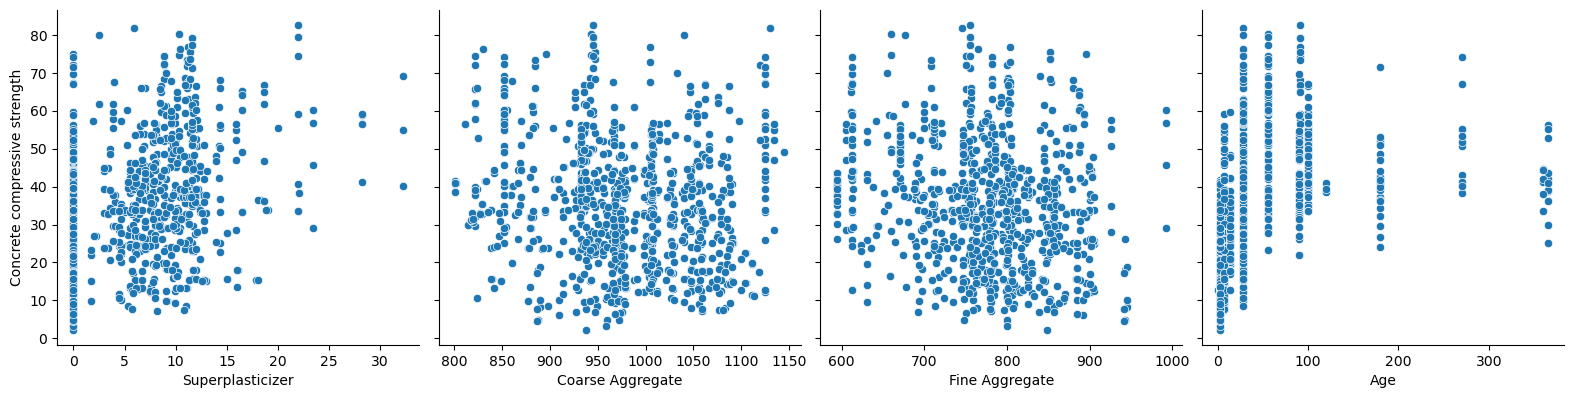

In [12]:
sns.pairplot(df, x_vars=['Superplasticizer','Coarse Aggregate','Fine Aggregate','Age'], 
             y_vars='Concrete compressive strength', height=4, aspect=1, kind='scatter')
plt.show()

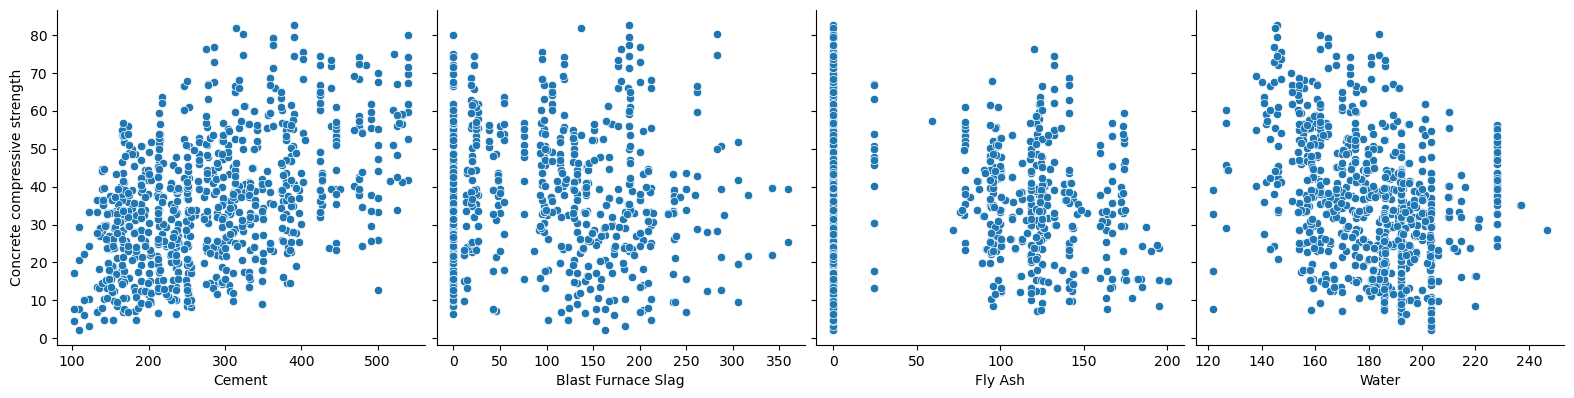

In [13]:
sns.pairplot(df, x_vars=['Cement', 'Blast Furnace Slag','Fly Ash','Water'], 
             y_vars='Concrete compressive strength', height=4, aspect=1, kind='scatter')
plt.show()

# Heatmap

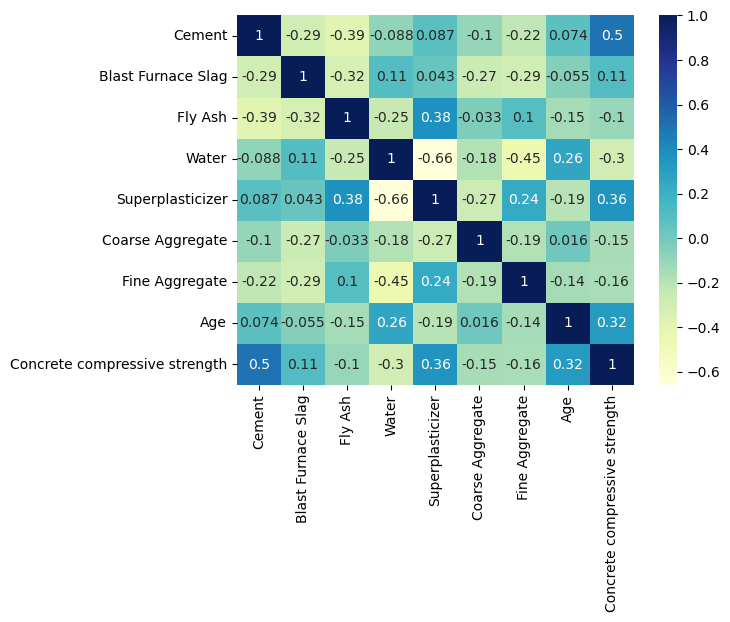

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
X = df[['Cement', 'Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
y = df['Concrete compressive strength']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =300)

In [17]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
235,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28
298,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28
119,249.1,0.0,98.8,158.1,12.8,987.8,889.0,56
81,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7
169,153.0,102.0,0.0,192.0,0.0,888.0,943.1,28
...,...,...,...,...,...,...,...,...
9,330.5,169.6,0.0,194.9,8.1,811.0,802.3,28
714,156.0,243.0,0.0,180.0,11.0,1022.0,698.0,28
917,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,14
481,322.0,0.0,116.0,196.0,10.0,818.0,813.0,28


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
516,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
111,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,3
639,265.0,111.0,86.0,195.0,6.0,833.0,790.0,28
105,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56
510,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,14
...,...,...,...,...,...,...,...,...
855,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28
871,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,100
835,250.0,0.0,95.7,191.8,5.3,948.9,857.2,100
792,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 300)

In [22]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
235,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28
298,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28
119,249.1,0.0,98.8,158.1,12.8,987.8,889.0,56
81,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7
169,153.0,102.0,0.0,192.0,0.0,888.0,943.1,28
...,...,...,...,...,...,...,...,...
9,330.5,169.6,0.0,194.9,8.1,811.0,802.3,28
714,156.0,243.0,0.0,180.0,11.0,1022.0,698.0,28
917,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,14
481,322.0,0.0,116.0,196.0,10.0,818.0,813.0,28


# Multiple Linear Regression 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  -14.72726882876119
Coefficients:


[('Cement', 0.1121113199744703),
 ('Blast Furnace Slag', 0.09284284937787299),
 ('Fly Ash', 0.08069261740036086),
 ('Water', -0.145291386285776),
 ('Superplasticizer', 0.35341330159461365),
 ('Coarse Aggregate', 0.016091708014096495),
 ('Fine Aggregate', 0.013959281022089438),
 ('Age', 0.11930011743486821)]

In [26]:
y_pred_mlr= mlr.predict(x_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [22.27645853 29.29838897 29.21937673 20.03710084 62.55368212 37.15849705
 26.18870199 58.07465548 46.2488525  55.7699668  25.35417732 43.59915685
 29.93031522 49.66733525 30.28823009 19.48326236 47.17680075 43.21375034
 67.55087675 24.8764007  31.57938781 43.33531584 29.83970681 35.47714447
 13.78048662 46.83231429 49.4940065  33.94663926 30.18404341 20.97478637
 23.52695799 50.77450532 52.30070259 33.18183829 40.60052633 50.96472004
 23.68682916 45.37595072 35.13782839 53.28357883 62.67024318 20.24258448
 63.26966201 30.67653582 34.56696091 28.17090227 22.5424033  24.24944303
 33.39937457 28.12994097 48.55978461 22.93714173 22.94604313 25.7573541
 56.04570676 53.77389343 28.23565428 26.71856196 17.29192476 43.65918467
 25.36143257 33.17721292 48.84836202 27.94323776 20.16491872 48.02591653
 27.68973783 24.84971143 28.67688739 24.32022467 53.24845215 41.67513316
 25.80525453 53.16027936 36.26958338 33.28708044 28.37684219 54.3497728
 53.02169666 60.1476505  42.

In [33]:
res = (y_test - y_pred_mlr)
res

113     8.163541
33      3.621611
565    -5.219377
562    -5.397101
804   -24.443682
         ...    
415    -5.493921
635   -10.118007
149   -27.300001
794    -4.090195
433     1.235495
Name: Concrete compressive strength, Length: 279, dtype: float64

In [34]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('R2: {:.2f}'.format(mlr.score(X,y)))
print('RSE:', meanAbErr)

R2: 0.60
RSE: 8.4518901163955


In [35]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R2: {:.2f}'.format(mlr.score(X,y)))

R2: 0.60


In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(648, 8)
(648,)
(279, 8)
(279,)


In [37]:
print('RES:', meanAbErr)

RES: 8.4518901163955


In [38]:
print('RMSE:', rootMeanSqErr)

RMSE: 10.85930526315651
